<a href="https://colab.research.google.com/github/hing999/datacamp_mls/blob/main/01_Supervised_Learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
!kaggle competitions download -c customer-churn-prediction-2020

  0% 0.00/154k [00:00<?, ?B/s]
100% 154k/154k [00:00<00:00, 46.9MB/s]


In [8]:
!unzip /content/customer-churn-prediction-2020.zip

Archive:  /content/customer-churn-prediction-2020.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [11]:
churn_df = pd.read_csv("/content/customer-churn-prediction-2020/train.csv")
churn_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [14]:
# Using scikit-learn to fit a classifier

from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(4250, 2) (4250,)


In [15]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [16]:
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [17]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: ['yes' 'no' 'no']


In [20]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 21, stratify = y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8745098039215686


In [74]:
# Model complexity and over/underfitting

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors :
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

In [68]:
neighbors.shape

(25,)

In [69]:
# neighbors = neighbors.reshape(1,25)

In [73]:
train_accuracies

0.8857142857142857

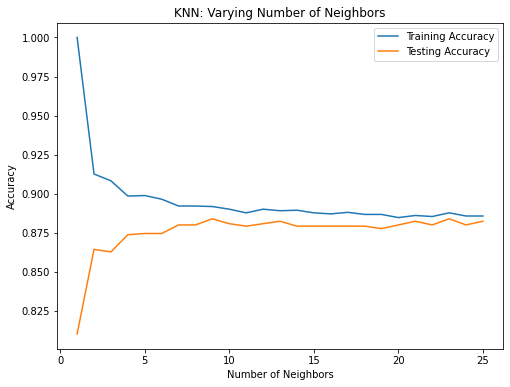

In [77]:
# Plotting our results

plt.figure(figsize = (8,6))

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Intorduction to regression

In [80]:
import pandas as pd
diabetes_df = pd.read_csv("/content/diabetes.csv")
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [82]:
# Creating Feature and Target Arrays

X = diabetes_df.drop("Glucose", axis = 1).values
y = diabetes_df["Glucose"].values

print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [96]:
# Making Predictions from a single feature

X_bmi = X[:,4]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [97]:
X[0,4]

33.6

In [98]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


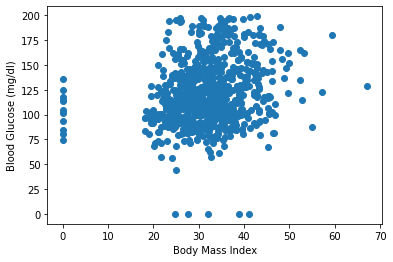

In [99]:
# Plotting glucose vs body mass index

import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

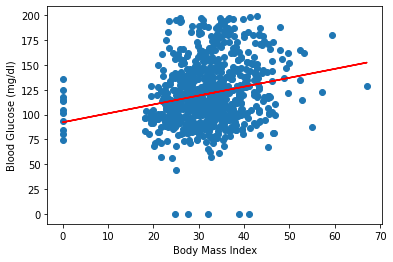

In [101]:
# Fitting a regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color ="red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [107]:
# Linear regression using all features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


In [109]:
# R-squared in scikit-learn
reg_all.score(X_test, y_test)

0.28280468810375115

In [110]:
# RMSE in scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

In [116]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg_all.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.28280468810375115
RMSE: 26.341459582232265


In [126]:
## Cross-validation in scikit-learn 

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [127]:
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [128]:
print(np.mean(cv_results), np.std(cv_results))

0.31909697867344783 0.07015320610114187


In [129]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24088592 0.41580685]


In [133]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


In [136]:
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)


[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


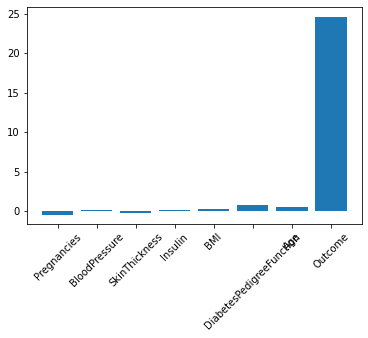

In [139]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso
X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values
names = diabetes_df.drop("Glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

How good is your model?

In [152]:
X = diabetes_df.drop("Outcome", axis = 1).values
y = diabetes_df["Outcome"].values

In [153]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [154]:
# Confusion matrix in scikit-learn

from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[163  43]
 [ 45  57]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



In [155]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [156]:
print(confusion_matrix(y_test, y_pred))

[[163  43]
 [ 45  57]]


In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



Logistic regression in scikit-learn

In [160]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [161]:
# Predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.26551030166574974


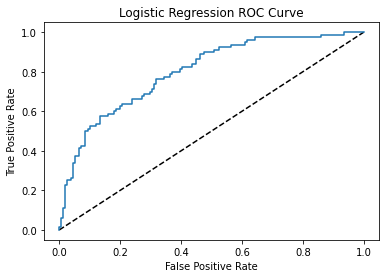

In [162]:
# Plotting the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [163]:
# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8002483443708608


Hyperparameter tuning

In [164]:
# GridSearchCV in scikit-learn
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.29579621663426436


In [165]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.295806841952537


In [166]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.1975974420032205


In [ ]:
## 제출
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))